In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data = pd.read_csv('Bank Customer Churn Prediction.csv')
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [4]:
data.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [5]:
data.shape

(10000, 12)

In [6]:
data_churn = pd.crosstab(index=data['churn'], columns="Total")
data_churn

col_0,Total
churn,
0,7963
1,2037


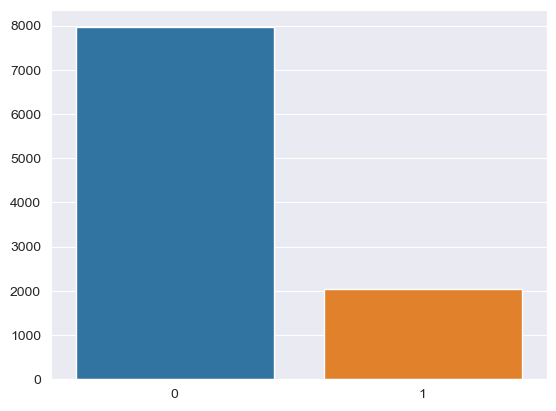

In [7]:
churn = data.churn.value_counts()
sns.set_style("darkgrid")
sns.barplot(x=churn.index, y = churn.values)
plt.title
plt.show()

In [8]:
replace_values = {"Germany": 0, "France": 1, "Spain": 2}
data['country'] = data['country'].map(replace_values)
replace_values2 = {"Male": 1, "Female": 0}
data['gender'] = data['gender'].map(replace_values2)

In [9]:
datanew = data.drop('customer_id', axis=1)

In [10]:
datanew.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


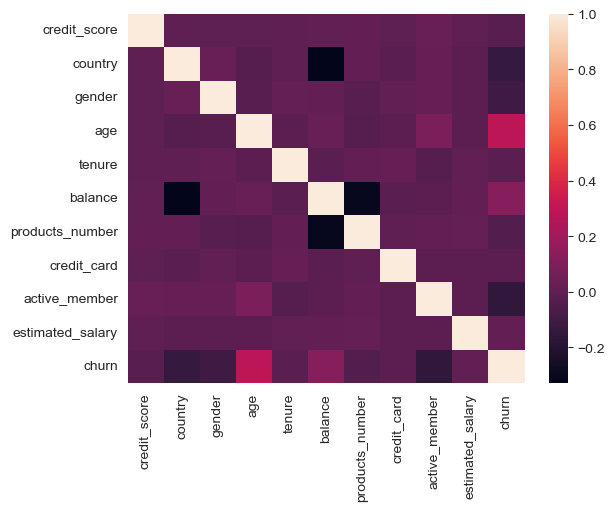

In [13]:
sns.heatmap(datanew.corr())
plt.show()

In [15]:
X = datanew.drop('churn', axis=1)
y = datanew['churn']

In [16]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=7)

In [17]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 78.60000000000001 %


In [19]:
# Randomforest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 86.05000000000001 %


In [20]:
# Support Vector Machine
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 79.45 %


In [21]:
# XGBoost
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 85.15 %


Classification report - n               precision    recall  f1-score   support

           0       0.87      0.96      0.92      1589
           1       0.76      0.46      0.58       411

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



Text(0.5, 1.0, 'Accuracy Score: 0.8605')

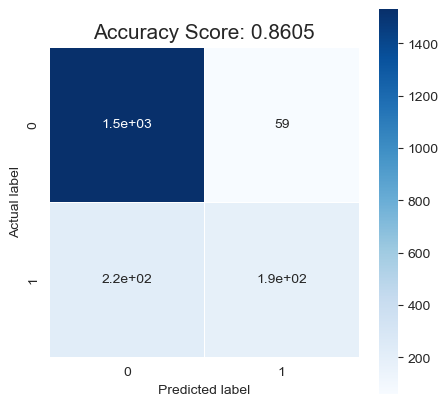

In [23]:
#importing classification report and confusion matrix from sklearn
# RandomForest
from sklearn.metrics import classification_report, confusion_matrix
y_pred = rfc.predict(X_test)
print("Classification report - n", classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

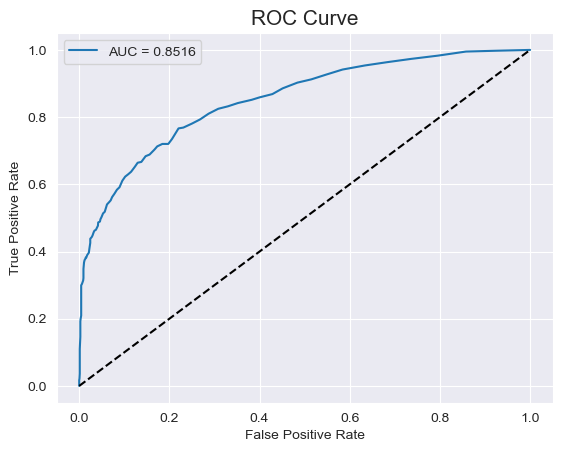

In [24]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

Classification report - n               precision    recall  f1-score   support

           0       0.87      0.95      0.91      1589
           1       0.71      0.47      0.57       411

    accuracy                           0.85      2000
   macro avg       0.79      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



Text(0.5, 1.0, 'Accuracy Score: 0.8515')

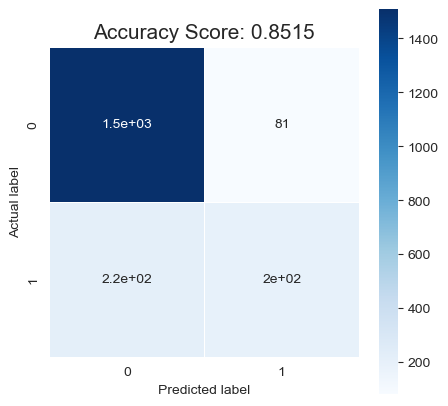

In [25]:
# XGBoost
y_pred = xgb_model.predict(X_test)
print("Classification report - n", classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(xgb_model.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

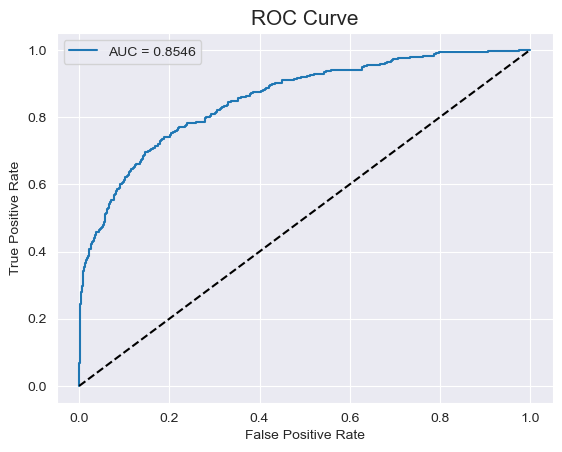

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = xgb_model.predict_proba(X_test)[:][:,1]
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()